In [1]:
#%pip install --upgrade xarray numpy matplotlib pandas seaborn pingouin

In [2]:
# import external packages
import xarray as xr
import pandas as pd
import seaborn as sns
import pingouin as pg

# Add path with self-created packages and import them
import sys
sys.path.append('./src')
import sciebo

# Pupil Position Analysis with Pandas and Pingouin

In the experiment reported by [Steinmetz et al, 2019 in Nature](https://www.nature.com/articles/s41586-019-1787-x), mcie perform a discrimination task where move the position of a stimulus using a steering wheel. During the experiment, a camera records the pupil position of the subject in the x and y directions.


##### Analysis Goals
In this notebook we will be analyzing the pupil position with statistical tests.

##### Learning Goals


We will explore the [**pingouin**](https://pingouin-stats.org/build/html/index.html) Python package to perform statistical tests like correlation analysis and t-tests. This will be complemented by visualisations with the [**Seaborn**](https://seaborn.pydata.org/) plotting package.


---

### Download Data and Load it into a Pandas DataFrame

In [2]:
sciebo.download_from_sciebo('https://uni-bonn.sciebo.de/s/3Uf2gScrvuTPQhB', 'data/steinmetz_2017-01-08_Muller.nc')

In [3]:
dset = xr.load_dataset('data/steinmetz_2017-01-08_Muller.nc')
df = dset[['pupil_x', 'pupil_y', 'contrast_left', 'contrast_right', 'wheel', 'response_type', 'active_trials']].to_dataframe().reset_index()
df = df[df['active_trials']]
df.head()

,trial,time,pupil_x,pupil_y,contrast_left,contrast_right,wheel,response_type,active_trials
0,1,0.01,-0.753684,1.716748,50,0,1,1.0,True
1,1,0.02,-0.774388,1.565163,50,0,0,1.0,True
2,1,0.03,-0.748939,1.605625,50,0,0,1.0,True
3,1,0.04,-0.766579,1.639666,50,0,1,1.0,True
4,1,0.05,-0.723780,1.691082,50,0,0,1.0,True


---

## Draw a best fitting line : Regression plots

Complex data can be characterised by simple underlying relations. For example we may expect that when the mouse is turning the wheel to the left, the eye also tracks to the left. This would explain the behaviour of both wheel speed and pupil position.

Let's assess whether the wheel speed and pupil position are related through regression plots. 

A regression plot shows two sets of datapoints as well as the best fitting line that describes their relationship to one another.

Correlation is described by two values: the `r` value and the `p` value.

The `r` value tells us how correlated the data is. An `r` of -1 means perfect negative correlation, and an `r` of 1 perfect positive correlation. An `r` of 0 suggest no correlation at all. 

The `p-val` is the probability that the data looks like it does if there is no correlation. A very small `p-val` suggests that we can reject the hypothesis that the data are uncorrelated. 


**Useful Code**


- **Pandas**
    - `pd.read_csv('my_file.csv')`: load `my_file.csv` into a pandas DataFrame
    - `df[df['colunm_name]== 6]`: select rows of the dataframe where `column_name` is 6 
   
- **Seaborn**
    - `sns.regplot(data=df, x='column1', y='column2')`: make a regression plot with columns `column1` and `column2` from dataframe `df`
    - `sns.scatterplot(data=df, x='column1', y='column2')`: make a scatterplot with columns `column1` and `column2` from dataframe `df`

- **pingouin**
  - `pg.corr(x_data, y_data)` : calculate the correlation between two variables `x_data` and `y_data`



**Exercises**

**Example**: Display the data for the trial number 11

In [ ]:
df[df['trial']==11]

Select the data for trial 37 and make a regression plot.   Do you think there is a correlation between wheel speed and pupil position? 

,n,r,CI95%,p-val,BF10,power
pearson,250,-0.212914,"[-0.33, -0.09]",0.000703,23.833,0.925686


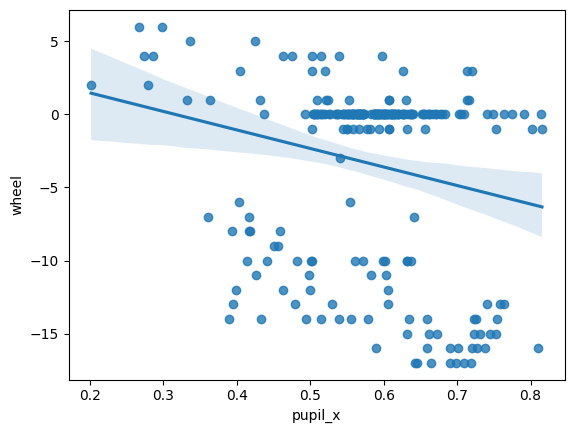

In [31]:
df_37 = df[df['trial']==37]
sns.regplot(data=df_37, x='pupil_x', y='wheel')
pg.corr(df_37['pupil_x'], df_37['wheel'], )

Now let's make the same regression plot for trial 11. Do you think there is a correlation between wheel speed and pupil position?

,n,r,CI95%,p-val,BF10,power
pearson,250,-0.083587,"[-0.21, 0.04]",0.187733,0.188,0.261241


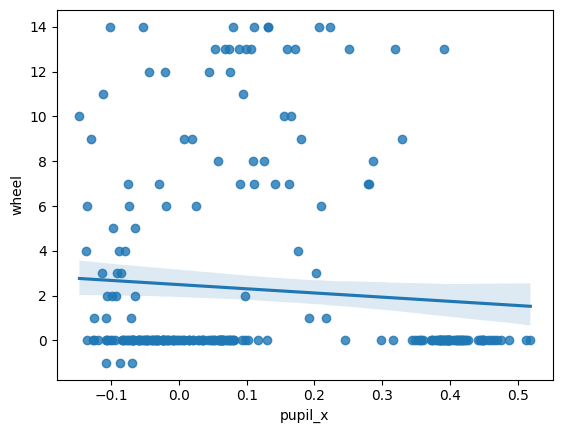

In [32]:
dd = df[df['trial']==11]
sns.regplot(data=dd, x='pupil_x', y='wheel')
pg.corr(dd['pupil_x'], dd['wheel'])

What other data might be correlated in `df`? Make a plot and explore your idea.

,n,r,CI95%,p-val,BF10,power
pearson,250,0.346506,"[0.23, 0.45]",1.838331e-08,5.398e+05,0.999905


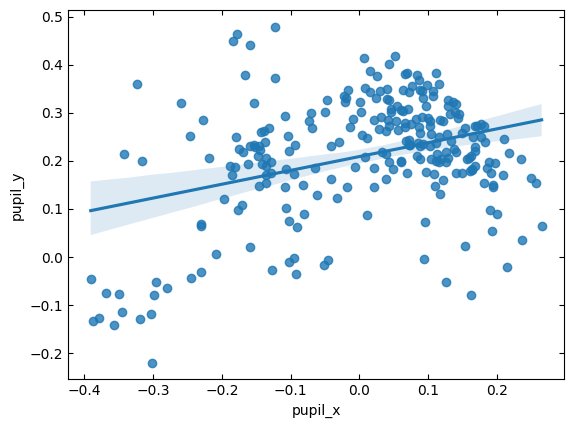

In [4]:
dd = df[df['trial']==13]
sns.regplot(data=dd, x='pupil_x', y='pupil_y', ci=95)
pg.corr(dd['pupil_x'], dd['pupil_y'])

Recreate the above plot but setting the `color` to a color of your choice.

,n,r,CI95%,p-val,BF10,power
pearson,250,0.346506,"[0.23, 0.45]",1.838331e-08,5.398e+05,0.999905


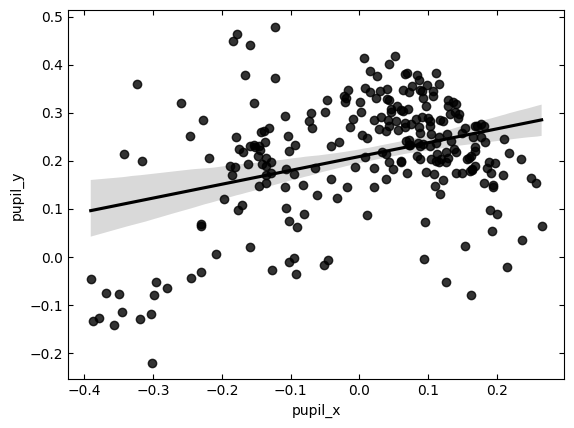

In [5]:
dd = df[df['trial']==13]
sns.regplot(data=dd, x='pupil_x', y='pupil_y', ci=95,color='black')
pg.corr(dd['pupil_x'], dd['pupil_y'])

Our plot is looking good! Let's make the line stand out. We can control the properties of the line by passing in a dictionary `line_kws` like this 

`sns.regplot(... line_kws={'property_1': 'value_1'})`

Make the line on your plot `red` and the points `black`


,n,r,CI95%,p-val,BF10,power
pearson,250,0.346506,"[0.23, 0.45]",1.838331e-08,5.398e+05,0.999905


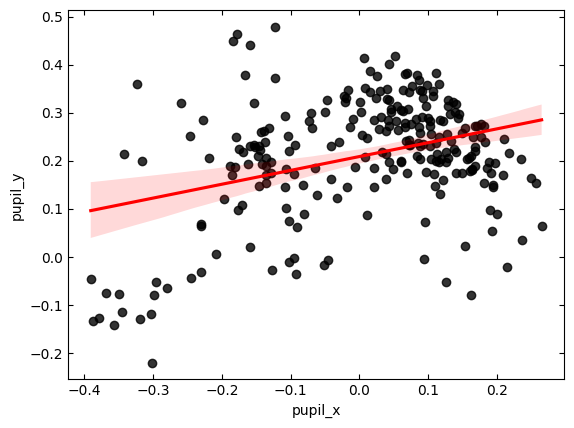

In [7]:
dd = df[df['trial']==13]
sns.regplot(data=dd, x='pupil_x', y='pupil_y',color='black', line_kws={'color':'red'})
pg.corr(dd['pupil_x'], dd['pupil_y'])

We are not limited by fitting just a straight line to our data. `seaborn` also allows us to fit polynomials by passing the `order` keyword into `regplot`.

Make a plot with a fit of `order` 2.

,n,r,CI95%,p-val,BF10,power
pearson,250,0.346506,"[0.23, 0.45]",1.838331e-08,5.398e+05,0.999905


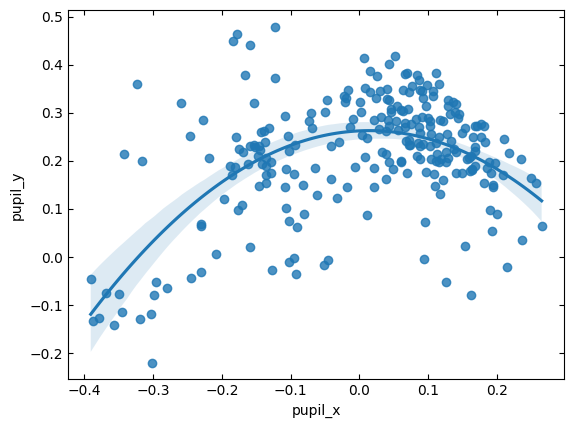

In [11]:
dd = df[df['trial']==13]
sns.regplot(data=dd, x='pupil_x', y='pupil_y', order=2)

pg.corr(dd['pupil_x'], dd['pupil_y'])

Make a scatterplot showing the x and y pupil positions for trial 11.

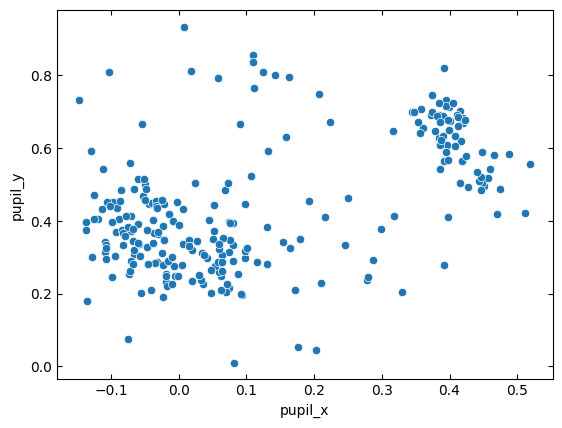

In [8]:
dd = df[df['trial']==11]
sns_plot = sns.scatterplot(data=dd, x='pupil_x', y='pupil_y')

By passing a column name into the `hue` argument of `sns.scatterplot`, the datapoints become colored according to the column. 

Make a scatterplot showing the `time` as a `hue`

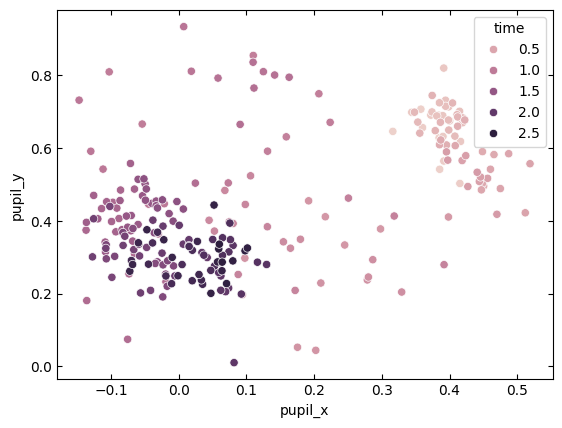

In [9]:
sns_plot = sns.scatterplot(data=dd, x='pupil_x', y='pupil_y', hue='time')

The function `sns.lmplot` does the same thing as `sns.lmplot`, but has some extra options. 

For example we can separate the dataframe based on a categorical column with the option `col`.

Make an `sns.lmplot()` of the pupil x and y positions of the dataframe `df`, setting the `col` to be `response_type`.

In [ ]:
sns.lmplot(data=df, x='pupil_x', y='pupil_y', order=2, col='response_type')

---

## Are my distributions similar? A t-test gives the answer

In data analysis, we often need qualitative answers: Is x bigger than y? By how much so? 

When we have two distributions, we can ask the question of whether they are statistically similar and get a qualitative answer from the t-test statistic.

In this section we will make histograms to visualise dsitributions of pupil position and employ the t-test to compare their similarity.

The t-test produces a T value which describes how similar two distributions are - when the T value is close to zero, the distributions are very similar.

Another important output of the t-test is the p value. This tells us the probability of our two inputted datasets being taken from the same underlying distribution. When the p-value is high, the distributions are likely to be the same. 

**Useful Code**
   
- **Seaborn**
    - `sns.histplot(data=df, x='column1')`: make a histogram with columns `column1`  from dataframe `df`

- **pingouin**
  - `pg.ttest(data1, data2)` : perform the t-test on two distributions `data1` and `data1`



**Exercises**

Make a histogram of the pupil x positions of trial 50 

<Axes: xlabel='pupil_x', ylabel='Count'>

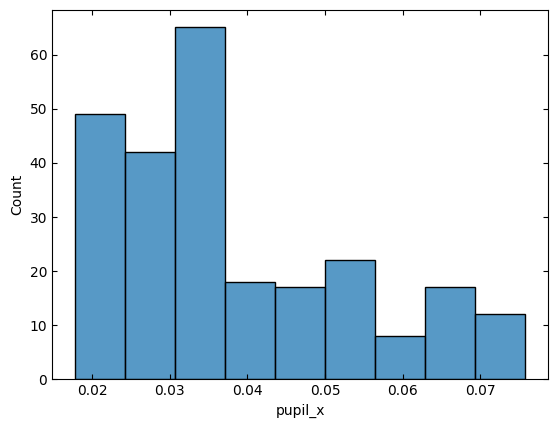

In [17]:
sns.histplot(data=df_50, x='pupil_x')

Make the same histogram but with `stat` set to `probability`. What has changed in the plot?

<Axes: xlabel='pupil_x', ylabel='Probability'>

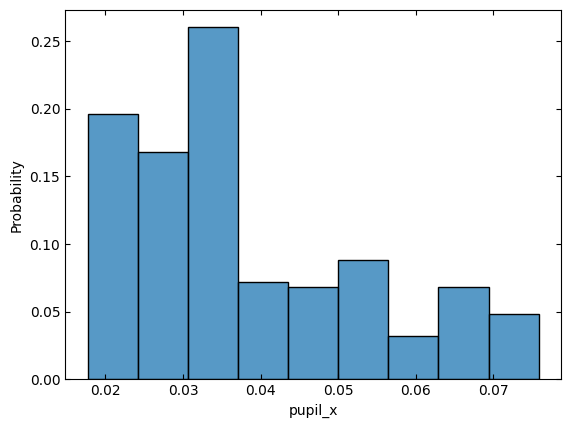

In [19]:
sns.histplot(data=df_50, x='pupil_x', stat='probability')

Create another histogram with a different option for `stat`. **Hint** - you can find the options by running `sns.histplot?`

<Axes: xlabel='pupil_x', ylabel='Percent'>

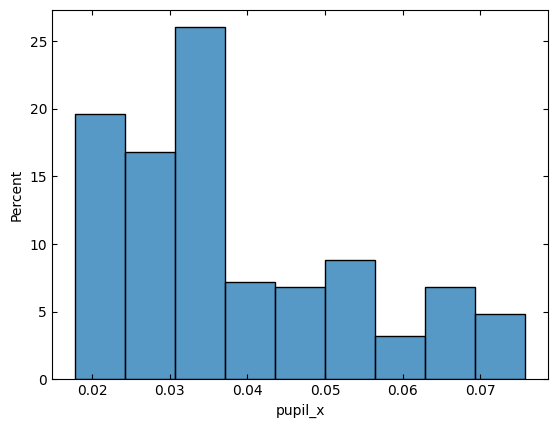

In [21]:
sns.histplot(data=df_50, x='pupil_x', stat='percent')

Make histograms of pupil x positions for trials 9 and 17

/home/ben/anaconda3/envs/ibots2/lib/python3.10/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-126.281694,498,two-sided,0.0,"[-0.82, -0.79]",11.294978,inf,1.0


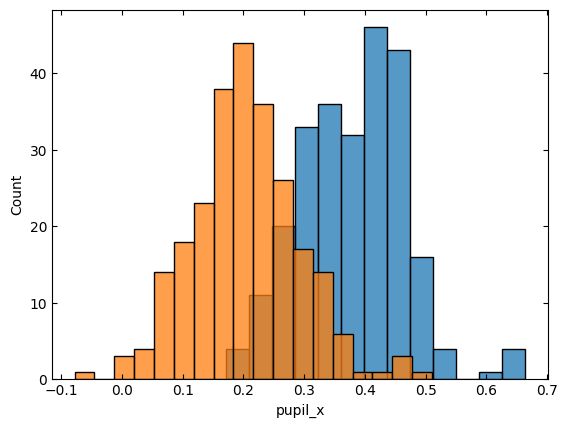

In [23]:
df_9 = df[df['trial']==9]
df_17 = df[df['trial']==17]

sns.histplot(data=df_9, x='pupil_x')
sns.histplot(data=df_17, x='pupil_x')

pg.ttest(df_17['pupil_x'], df_9['pupil_x'])
pg.ttest(df_50['pupil_x'], df_17['pupil_x'])

We can alter the histogram binning by providing several options to `sns.histplot`, for example `binwidth`.

Recreate the above plot setting `binwidth` to 0.01

/home/ben/anaconda3/envs/ibots2/lib/python3.10/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-126.281694,498,two-sided,0.0,"[-0.82, -0.79]",11.294978,inf,1.0


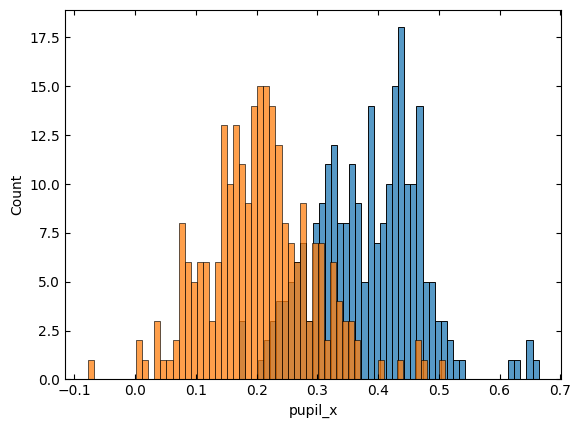

In [22]:
df_9 = df[df['trial']==9]
df_17 = df[df['trial']==17]

sns.histplot(data=df_9, x='pupil_x',binwidth=0.01)
sns.histplot(data=df_17, x='pupil_x',binwidth=0.01)
pg.ttest(df_50['pupil_x'], df_17['pupil_x'])

Let's make the bins for each histogram to be aligned. We can set the parameter `binrange` to be the same for both histograms. `binrange` sets the values of the lowest and highest bins.

Use the above plot to find values for `binrange` to make both historgrams aligned in the same bins

/home/ben/anaconda3/envs/ibots2/lib/python3.10/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-126.281694,498,two-sided,0.0,"[-0.82, -0.79]",11.294978,inf,1.0


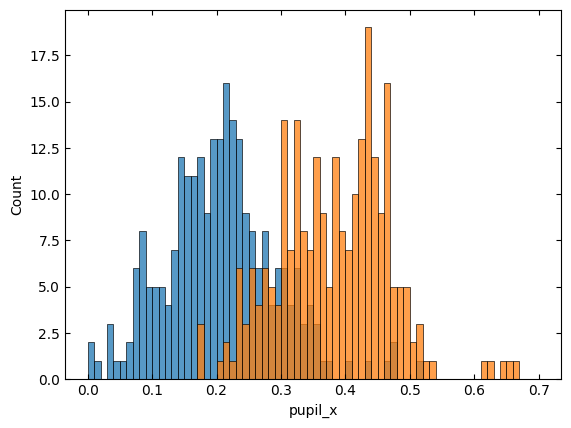

In [21]:
df_9 = df[df['trial']==9]
df_17 = df[df['trial']==17]
sns.histplot(data=df_17, x='pupil_x', binwidth=0.01, binrange=[0.0,0.7])
sns.histplot(data=df_9, x='pupil_x',binwidth=0.01, binrange=[0.0,0.7])
pg.ttest(df_50['pupil_x'], df_17['pupil_x'])

Now plot the distributions of pupil x positions for trials 17 and 50. Do you think they look similar?

/home/ben/anaconda3/envs/ibots2/lib/python3.10/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-126.281694,498,two-sided,0.0,"[-0.82, -0.79]",11.294978,inf,1.0


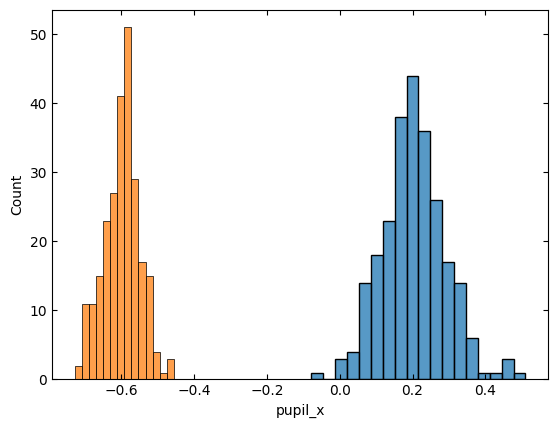

In [19]:
df_50 = df[df['trial']==50]
df_17 = df[df['trial']==17]
sns.histplot(data=df_17, x='pupil_x', stat='count')
sns.histplot(data=df_50, x='pupil_x', stat='count')

pg.ttest(df_50['pupil_x'], df_17['pupil_x'])

We will now perform a t-test with `pingouin` to asses how similar the above distributions are

In [4]:
pg.ttest(df[df.trial==17]['pupil_x'], df[df.trial==50]['pupil_x'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.697903,498,two-sided,0.485564,"[-0.0, 0.0]",0.062422,0.126,0.107169


Let's check the result of the t-test when we compare the pupil x positions of trial 50 with itself

In [9]:
pg.ttest(df[df.trial==50]['pupil_x'], df[df.trial==50]['pupil_x'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.0,498,two-sided,1.0,"[-0.0, 0.0]",0.0,0.099,0.05


Here the T value is 0 exactly, and the `p-val` is 1.0 because the inputted data is definitely the same!

Assess how similar the pupil x positions are for trials 8 and 134. What do you find?

In [25]:
df_8 = df[df['trial']==8]
df_134 = df[df['trial']==134]
pg.ttest(df_8['pupil_x'], df_134['pupil_x'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,34.700311,498,two-sided,5.272243e-135,"[1.28, 1.43]",3.10369,7.442e+130,1.0


Do you think that the histograms of the pupil x positions for trials 8 and 134 will look similar? 

Plot the histograms and find out.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,34.700311,498,two-sided,5.272243e-135,"[1.28, 1.43]",3.10369,7.442e+130,1.0


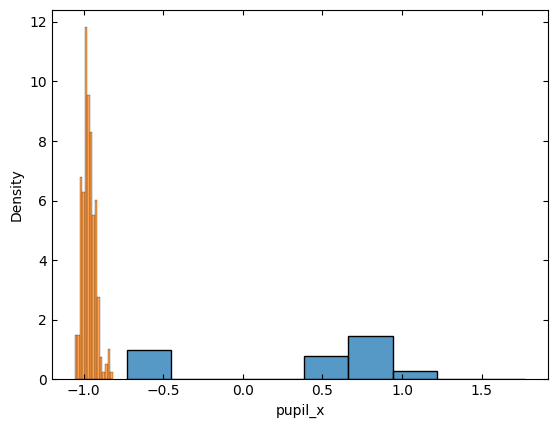

In [26]:
df_8 = df[df['trial']==8]
df_134 = df[df['trial']==134]
sns.histplot(data=df_8, x='pupil_x', stat='density')
sns.histplot(data=df_134, x='pupil_x', stat='density')
pg.ttest(df_8['pupil_x'], df_134['pupil_x'])

---

## A Gallery of Plots : 2D Histograms

We have explored histograms in depth, now it's time to take a look at 2D Histograms. 

The seaborn provides the `jointplot` which produces a rich variety of 2D histograms. 

Let's visualise the pupil position data with `jointplot`


**Useful Code**
   
- **Seaborn**
    - `sns.pointplot(data=df, x='column1', y='column2')`: make a 2D histogram with columns `column1` and `column2` from dataframe `df`


Make a `jointplot` showing the pupil x and y data of trial 13

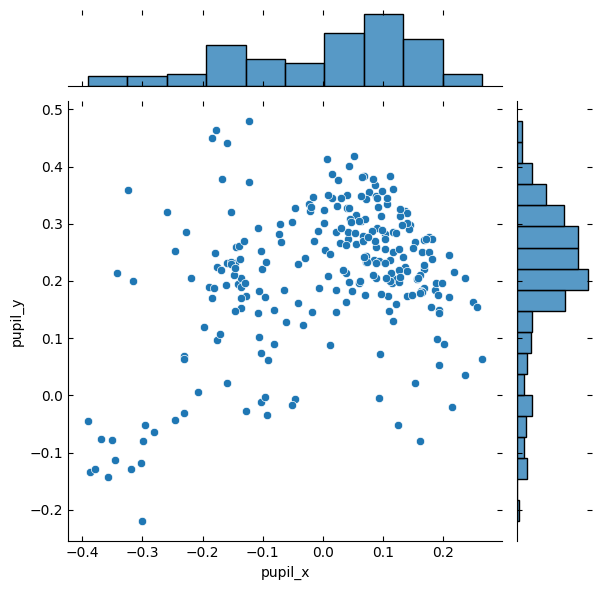

In [32]:
df_13 = df[df['trial']==13]
sns.jointplot(df_13, x="pupil_x", y="pupil_y")

We can split the data according to `response_type` via the `hue` option. 

Make a 2D histogram of the pupil positions for all trials where the data is separated according to `response_type`

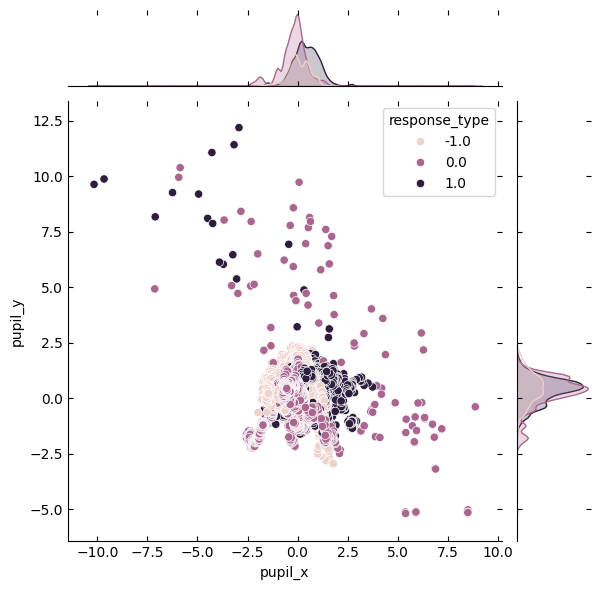

In [34]:

sns.jointplot(df, x="pupil_x", y="pupil_y", hue='response_type')

The type of 2D histogram can be altered by provinding the keyword `kind`

Make a 2D histogram of the pupil positions for trial 13 with `kind='kde'`

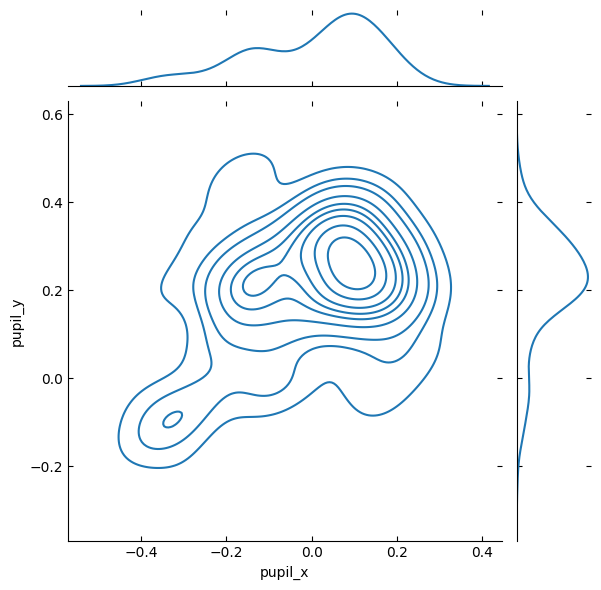

In [35]:
df_13 = df[df['trial']==13]
sns.jointplot(df_13, x="pupil_x", y="pupil_y", kind= 'kde')

Recreate the above plot with `kind='hex'`

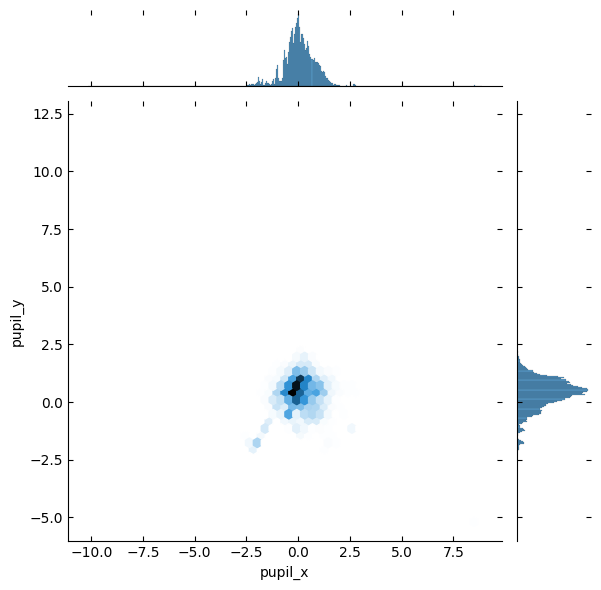

In [30]:
df_13 = df[df['trial']==13]
sns.jointplot(df_13, x="pupil_x", y="pupil_y", kind= 'hex')

Make a final plot with a different `kind`. **Hint** - use `sns.jointplot?` to find out what kinds are available.

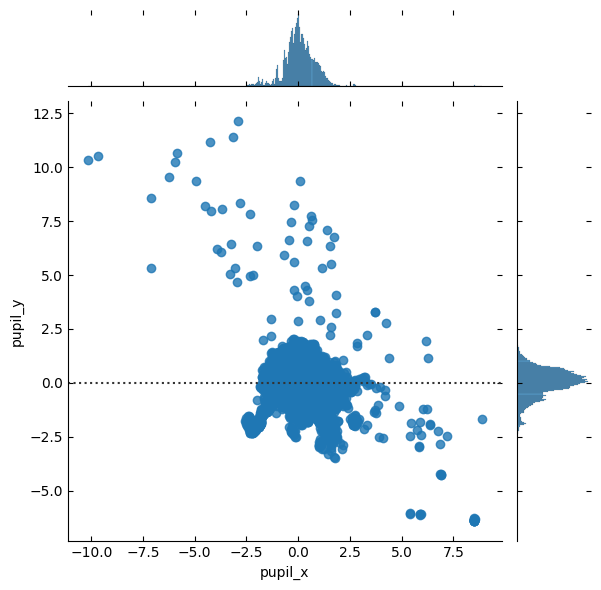

In [36]:
sns.jointplot(df, x="pupil_x", y="pupil_y", kind= 'resid')